# Letsgrowmore
# Name - Pooja Narkhede
# Task  - Stock Market Prediction and Forecasting using stacked LSTM
# Task_Level - Beginner level Task 

# Import Necessary library 

In [58]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense, LSTM 
import math
from sklearn.metrics import mean_squared_error 

# Import Dataset

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
data.shape

(2035, 8)

In [6]:
data.dtypes 

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [7]:
data.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [15]:
data = data.sort_index(ascending=True,axis=0)
new_data = pd.DataFrame(index=range(0,len(data)),columns=['Close'])
for i in range(0,len(data)):
    new_data['Close'][i] = data['Close'][i]

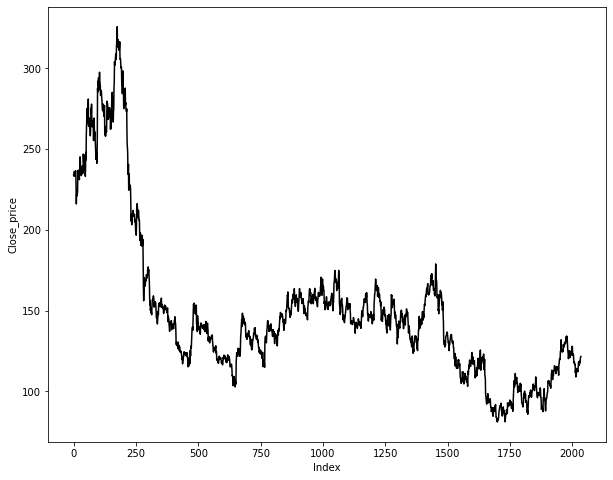

In [22]:
plt.figure(figsize=(10,8))
plt.plot(new_data['Close'],color = 'black')
plt.xlabel('Index')
plt.ylabel('Close_price')
plt.show()

In [25]:
scale = MinMaxScaler(feature_range=(0,1))
scale_data = scale.fit_transform(np.array(new_data).reshape(-1,1))

In [29]:
set_size = int(len(data)*0.5)
train = scale_data[0:set_size,:]
test = scale_data[set_size:,:]

In [30]:
#Now creating our dataset for x_train and y_train, x_test and y_test 
def create_dataset(dataset, time_step):
    x, y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        x.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(x), np.array(y)

In [31]:
time_step = 100
X_train, Y_train = create_dataset(train, time_step)
X_test, Y_test = create_dataset(test, time_step)

In [34]:
X_train.shape,Y_train.shape 

((916, 100), (916,))

In [35]:
X_test.shape, Y_test.shape 

((917, 100), (917,))

In [48]:
x_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
x_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
y_train = np.asarray(Y_train).astype(np.float)
y_test = np.asarray(Y_test).astype(np.float)

# LSTM Model 

In [55]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True)) 
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train, Y_train, epochs=1, batch_size=1, verbose=2) 

916/916 - 73s - loss: 0.0043 - 73s/epoch - 80ms/step


# Prediction 

In [57]:
x_test1 = np.asarray(x_test).astype(np.float)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test1)
train_predict = scale.inverse_transform(train_pred)
test_predict = scale.inverse_transform(test_pred)

# Model Evaluation 

In [59]:
print('MSE for Training Data',math.sqrt(mean_squared_error(y_train,train_predict)))
print('MSE for Testing Data',math.sqrt(mean_squared_error(y_test,test_predict)))

MSE for Training Data 176.95032915188756
MSE for Testing Data 127.6970500361279


Text(0, 0.5, 'Closing price')

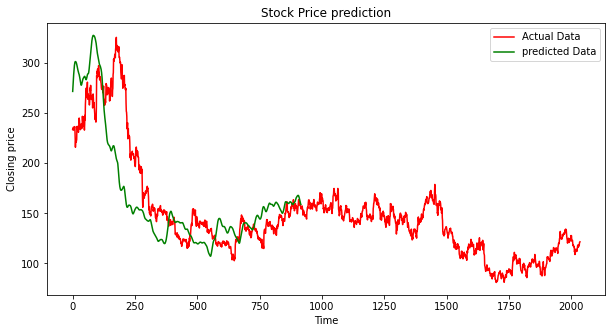

In [60]:
plt.figure(figsize=(10,5))
plt.plot(new_data['Close'],color='red',label='Actual Data')
plt.plot(train_predict,color='Green',label = 'predicted Data')
plt.legend()
plt.title("Stock Price prediction")
plt.xlabel('Time')
plt.ylabel('Closing price')